# **Summary of the project**

The project aims to analyze data to determine the locations in Madagascar airspace that experience the highest congestion. It will also identify the times within a 24-hour period that are more prone to congestion and investigate potential causes by examining the correlation between turbulence and flight rules.

# **II-Data:** 
The data we have collected are data from September 2022 to June 2023 which  contains the following column: 
1. Line Number: Identification number for the flight record.
2. Immatriculation: Aircraft registration number.
3. Avion Type: Type of aircraft used for the flight.
4. Turbulence Type (1, 2, 3, 4): Categorization of turbulence intensity.
5. Departure Emplacement (ICAO code): ICAO code representing the departure location.
6. Destination Emplacement (ICAO code): ICAO code representing the destination location.
7. Flight Rule: Flight rules followed, categorized as VFR-VMC (Visual Flight Rules - Visual Meteorological Conditions) or IFR-IMC (Instrument Flight Rules - Instrument Meteorological Conditions).
8. Radioborn Maker - Avion Capacity (COMNAV): Manufacturer of the radio equipment installed in the aircraft for communication and navigation purposes.
9. Radioborn Maker - Avion Capacity (Surveillance): Manufacturer of the radio equipment installed in the aircraft for surveillance purposes.
10. Flight Number Landing (INT): Flight number for the landing.
11. Regional or International Flight: Indicates whether the flight is regional or international.
12. Date: Date of the flight.
13. Entry Point: Point of entry into a specific airspace or region.


In [1]:
#libraries that I used throhought the Analysis
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import calendar

In [2]:
# See how many files there are in the directory. 
# "!" commands are called "magic commands" and allow you to use bash
file_dir = '../input/asecnasj2223'
!ls $file_dir


20220927.csv  20221124.csv  20230110.csv  20230218.csv	20230329.csv
20220928.csv  20221125.csv  20230111.csv  20230219.csv	20230330.csv
20220929.csv  20221126.csv  20230112.csv  20230220.csv	20230331.csv
20220930.csv  20221127.csv  20230113.csv  20230221.csv	20230401.csv
20221001.csv  20221128.csv  20230114.csv  20230222.csv	20230402.csv
20221002.csv  20221129.csv  20230115.csv  20230223.csv	20230403.csv
20221003.csv  20221130.csv  20230116.csv  20230224.csv	20230404.csv
20221004.csv  20221201.csv  20230117.csv  20230225.csv	20230405.csv
20221005.csv  20221202.csv  20230118.csv  20230226.csv	20230406.csv
20221006.csv  20221203.csv  20230119.csv  20230227.csv	20230407.csv
20221007.csv  20221204.csv  20230120.csv  20230228.csv	20230408.csv
20221008.csv  20221205.csv  20230121.csv  20230301.csv	20230409.csv
20221010.csv  20221206.csv  20230122.csv  20230302.csv	20230410.csv
20221011.csv  20221207.csv  20230123.csv  20230303.csv	20230411.csv
20221012.csv  20221208.csv  20230124.csv  202303

In [3]:
# Number of files we are dealing with
!ls $file_dir | wc -l

194


In [4]:
files = glob.glob(os.path.join(file_dir, "*.csv"))

All my file where displayed as one column and not 18, I use this code to make sure it work and then loop over the 196 file

In [5]:
import pandas as pd

data_file = '/kaggle/input/asecnasj2223/20220927.csv'

data = pd.read_csv(data_file, header=None)

df = pd.DataFrame({'Data': data[0]})
df[['Line Number',             # Identification number for the flight record.
              'Immatriculation',         # Aircraft registration number.
              'Avion Type',               # Type of aircraft used for the flight.
              'Turbulence Type ',  # Categorization of turbulence intensity.
              'Departure Emplacement (ICAO code)',   # ICAO code representing the departure location.
              'Destination Emplacement (ICAO code)',  # ICAO code representing the destination location.
              'Flight Rule',              # Flight rules followed: VFR-VMC or IFR-IMC.
              'Radioborn Maker - Avion Capacity (COMNAV)',    # Manufacturer of communication and navigation equipment.
              'Radioborn Maker - Avion Capacity (Surveillance)',   # Manufacturer of surveillance equipment.
              'Flight Number Landing (INT)',  # Flight number for the landing.
              'Regional or International Flight',   # Indicates if the flight is regional or international.
              'Date',                     # Date of the flight.
              'Entry Point',              # Point of entry into a specific airspace or region.
              'Hour of Entry',            # Time of entry into the specified airspace or region.
              'Flight Level',             # Altitude at which the aircraft is flying.
              'Exit Point',               # Point of exit from a specific airspace or region.
              'Hour of Exit',             # Time of exit from the specified airspace or region.
              'Progression of the Flight'  # Description of the flight's progression or trajectory.
   ]] = df['Data'].str.split('\s+', expand=True, n=17)

df = df.drop('Data', axis=1)

df.shape


(107, 18)

In [6]:
import os

# List of file paths matching a specific pattern
file_paths = glob.glob('/kaggle/input/asecnasj2223/*.csv')

# Empty list to store the DataFrames
dfs = []

# Iterate over each file path
for file_path in file_paths:
    # Extract the file name without the extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None)
    df = pd.DataFrame({'Data': data[0]})
    df[['Line Number', 'Immatriculation', 'Avion Type', 'Turbulence Type', 'Departure Emplacement (ICAO code)',
        'Destination Emplacement (ICAO code)', 'Flight Rule', 'Radioborn Maker - Avion Capacity (COMNAV)',
        'Radioborn Maker - Avion Capacity (Surveillance)', 'Flight Number Landing (INT)',
        'Regional or International Flight', 'Date', 'Entry Point', 'Hour of Entry', 'Flight Level',
        'Exit Point', 'Hour of Exit', 'Progression of the Flight']] = df['Data'].str.split('\s+', expand=True, n=17)
    
    # Assign the file name as the value in the 'Date' column
    df['Date'] = file_name
    
    df = df.drop('Data', axis=1)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
combined_df = pd.concat(dfs)

# Reset the index of the combined DataFrame
combined_df = combined_df.reset_index(drop=True)

combined_df.head()


,Line Number,Immatriculation,Avion Type,Turbulence Type,Departure Emplacement (ICAO code),Destination Emplacement (ICAO code),Flight Rule,Radioborn Maker - Avion Capacity (COMNAV),Radioborn Maker - Avion Capacity (Surveillance),Flight Number Landing (INT),Regional or International Flight,Date,Entry Point,Hour of Entry,Flight Level,Exit Point,Hour of Exit,Progression of the Flight
0,MAU855,3BNBU,A339,H,FIMP,FAOR,I,SDE3FGHIJ3J4J5M1RWY,LB1D1,OVF,INTERNATIONAL,20221210,GERAG,2117,400,SUNIR,2254,400 /NANTA;2127;400/DUPTO;2154;400/TU;2226;40...
1,KQA263,5YFFB,E190,M,FMMI,HKJK,I,SCDE2E3FGHIRWYZ,LB1,DEP,INTERNATIONAL,20221210,FMMI,2340,360,KINAN,0107,360 /TNV;2341;58/ZAPR;2343;78/1838S04726E;234...
2,FBU702,FHMIX,A359,H,LFPO,FMEE,I,ABDE1E2E3GHIJ1J2J3J4J5LM1OP2RVWXYZ,LB1D1,OVF,INTERNATIONAL,20221210,DENLI,2356,390,UVENA,0102,390 /ZCRNA;2356;350/IXEBU;0012;390/1225S05132...
3,CFG2314,DAIYD,A332,H,EDDF,FIMP,I,SDE1E2E3FGHIJ5LM1OP2RVWXYZ,LB1D1,OVF,INTERNATIONAL,20221210,ATOLA,0036,390,APLEM,0202,390 /ZCRNA;0036;390/BIRAL;0046;390/DO;0103;39...
4,AFR652,FGSQX,B77W,H,LFPG,FMEE,I,SDE2E3FGHIJ3J5M1P2RWXYZ,LB1D1,OVF,INTERNATIONAL,20221210,DENLI,0104,350,UVENA,0212,350 /ZCRNA;0104;370/IXEBU;0121;370/MIDRI;0131...


In [7]:
# Export the combined DataFrame to a CSV file
combined_df.to_csv('combined_data.csv', index=False)

# **III. Time-Based: Congestion Analysis**

With our data prepared for analysis, the primary objective for this week is to ascertain peak congestion periods by examining the monthly, daily, and hourly flight volumes. By identifying these periods, we can gain valuable insights into the patterns of congestion and develop strategies to mitigate its impact.


**1)Peak month**:

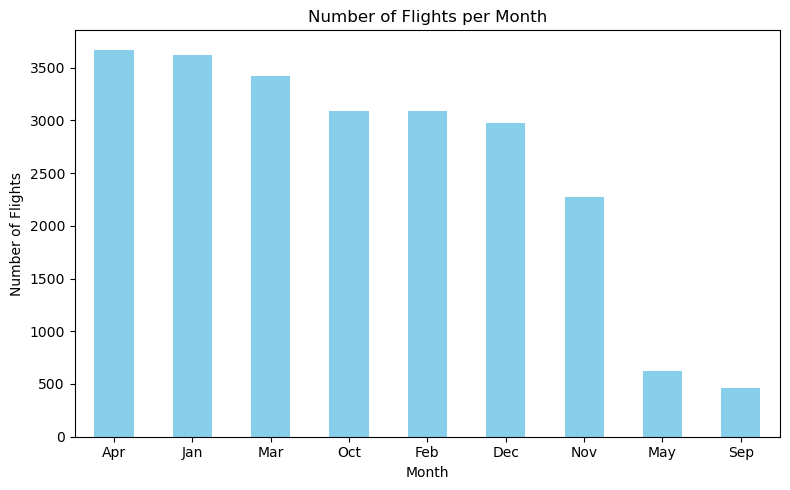

Month with the most flights: Apr


In [8]:
import pandas as pd
# Convert 'Date' column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%Y%m%d')

# Extract the month from the 'Date' column and convert to month names
combined_df['Month'] = combined_df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])

# Count the number of flights per month
flight_counts = combined_df['Month'].value_counts()

# Determine the month with the most flights
most_flights_month = flight_counts.idxmax()

# Visualization
plt.figure(figsize=(8, 5))
flight_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Month with the most flights:", most_flights_month)


In [9]:
combined_df.columns


Index(['Line Number', 'Immatriculation', 'Avion Type', 'Turbulence Type',
       'Departure Emplacement (ICAO code)',
       'Destination Emplacement (ICAO code)', 'Flight Rule',
       'Radioborn Maker - Avion Capacity (COMNAV)',
       'Radioborn Maker - Avion Capacity (Surveillance)',
       'Flight Number Landing (INT)', 'Regional or International Flight',
       'Date', 'Entry Point', 'Hour of Entry', 'Flight Level', 'Exit Point',
       'Hour of Exit', 'Progression of the Flight', 'Month'],
      dtype='object')

Well, we can notice that April is the time where there are a lot of flight data

**2)Peak day of the week:**


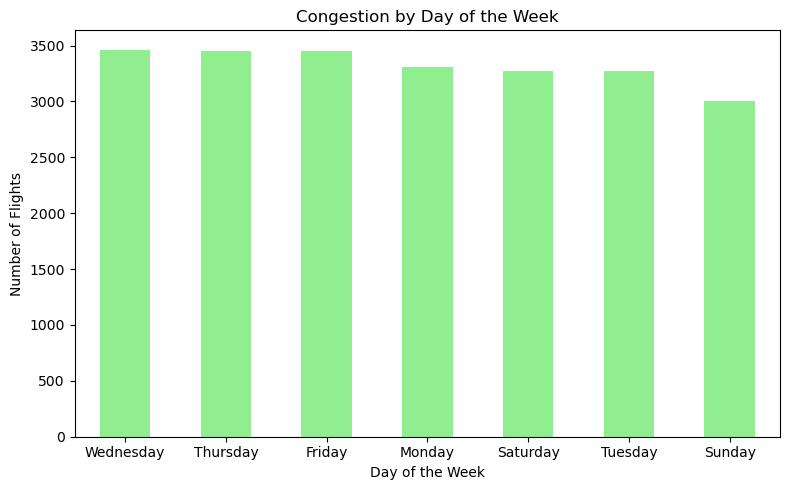

Most congested day of the week: Wednesday


In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Date' column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%Y%m%d')

# Extract the day of the week from the 'Date' column
combined_df['DayOfWeek'] = combined_df['Date'].dt.day_name()

# Count the number of flights for each day of the week
daily_congestion = combined_df['DayOfWeek'].value_counts()

# Determine the most congested day
most_congested_day = daily_congestion.idxmax()

# Visualization
plt.figure(figsize=(8, 5))
daily_congestion.plot(kind='bar', color='lightgreen')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.title('Congestion by Day of the Week')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Most congested day of the week:", most_congested_day)


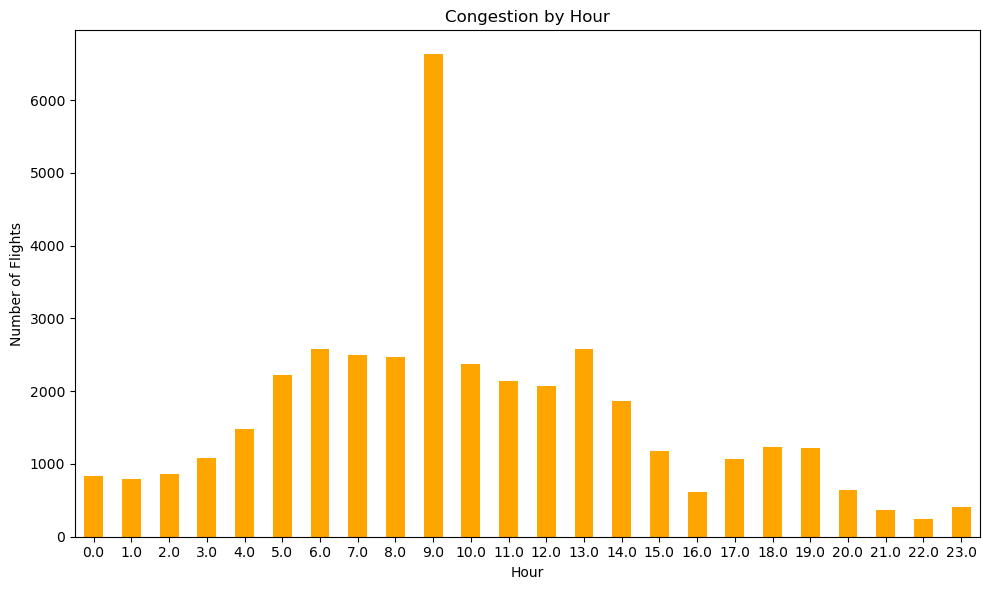

Hour with the highest congestion: 9.0


In [11]:

# Convert 'Hour of Entry' and 'Hour of Exit' columns to datetime format
combined_df['Hour of Entry'] = pd.to_datetime(combined_df['Hour of Entry'], format='%H%M', errors='coerce')
combined_df['Hour of Exit'] = pd.to_datetime(combined_df['Hour of Exit'], format='%H%M', errors='coerce')

# Number of flights for each hour of entry
hourly_flight_counts_entry = combined_df['Hour of Entry'].dt.hour.value_counts().sort_index()

# Number of flights for each hour of exit
hourly_flight_counts_exit = combined_df['Hour of Exit'].dt.hour.value_counts().sort_index()

# Merge the entry and exit flight counts
hourly_flight_counts = pd.concat([hourly_flight_counts_entry, hourly_flight_counts_exit], axis=1, keys=['Entry', 'Exit'])
hourly_flight_counts = hourly_flight_counts.fillna(0)

# Total flights for each hour
hourly_flight_counts['Total'] = hourly_flight_counts['Entry'] + hourly_flight_counts['Exit']

peak_hour = hourly_flight_counts['Total'].idxmax()

# Visualization
plt.figure(figsize=(10, 6))
hourly_flight_counts['Total'].plot(kind='bar', color='orange')
plt.xlabel('Hour')
plt.ylabel('Number of Flights')
plt.title('Congestion by Hour')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Hour with the highest congestion:", peak_hour)


Peak Month: April, Peak Day: Wednesday, Peak Hour: 9

**Summary:**

From this analysis, I have determined the peak congestion periods for air travel from September 2022 to June 2023. Through careful examination, I found that the month of April experiences the highest volume of flights, while Wednesdays prove to be the most congested days. Additionally, peak congestion within a given day occurs at 9 o'clock. In the following I will analyze space.

**IV- AIRSPACE OPTIMIZATION:**
Learning Networkit to being able to trace every possible directory for a flight, then now the best path for this flight


This is to start with one node

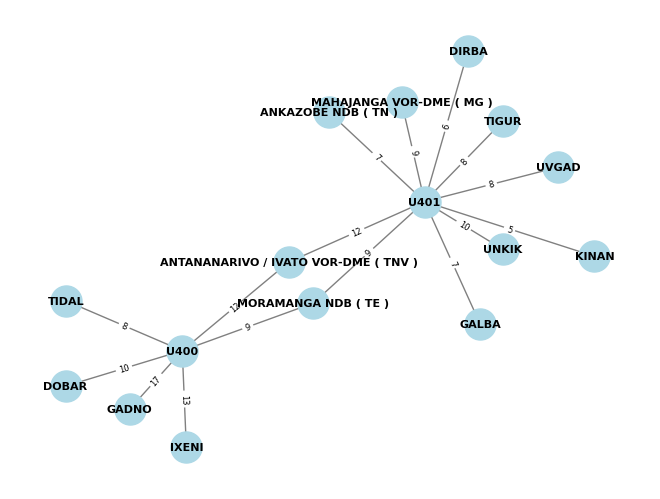

['U400', 'ANTANANARIVO / IVATO VOR-DME ( TNV )', 'U401']
['U400', 'MORAMANGA NDB ( TE )', 'U401']


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

routes = ["U400", "U401"]
G.add_nodes_from(routes)

edges = [
    ("U400", "GADNO", {"weight": 17}),
    ("U400", "TIDAL", {"weight": 8}),
    ("U400", "DOBAR", {"weight": 10}),
    ("U400", "ANTANANARIVO / IVATO VOR-DME ( TNV )", {"weight": 12}),
    ("U400", "MORAMANGA NDB ( TE )", {"weight": 9}),
    ("U400", "IXENI", {"weight": 13}),
    ("U401", "KINAN", {"weight": 5}),
    ("U401", "GALBA", {"weight": 7}),
    ("U401", "MAHAJANGA VOR-DME ( MG )", {"weight": 9}),
    ("U401", "UVGAD", {"weight": 8}),
    ("U401", "DIRBA", {"weight": 6}),
    ("U401", "ANKAZOBE NDB ( TN )", {"weight": 7}),
    ("U401", "ANTANANARIVO / IVATO VOR-DME ( TNV )", {"weight": 12}),
    ("U401", "MORAMANGA NDB ( TE )", {"weight": 9}),
    ("U401", "TIGUR", {"weight": 8}),
    ("U401", "UNKIK", {"weight": 10})
]
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=8, font_weight="bold", edge_color="gray")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
plt.show()

all_paths = nx.all_simple_paths(G, source="U400", target="U401")
for path in all_paths:
    print(path)


This is one of the attempts but it did not work.. yet :))